# SQL Alchemy Challenge-Hawaiian Trip!

**Trip dates--January 1-14, 2021**

**Wouldn't it be amazing if this was actually a possibility.**

In [1]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import pprint as pp
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#Create engine using hawaii.sqlite file 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#Declare a Base using automap_base()
Base = automap_base()

In [7]:
# Use Base class to reflect hawaii database tables
Base.prepare(engine, reflect = True)

In [8]:
#Check and see what tables the hawaii database brought in
Tables = Base.classes.keys()
Tables

['measurement', 'station']

In [9]:
#Save measurement and station table refs to their own variables 
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
#Create a session to perform exploratory data analysis 
session = Session(engine)

In [11]:
#Make timedelta to look back on last 12 mo precip data
year = timedelta(days = 365)

# Exploratory Climate Analysis

##### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [12]:
# Start with finding last date in dataset
last = session.query(func.max(measurement.date))

In [13]:
#Initialize list to store last date object when we find it
last_date = []

In [14]:
#Add last date to its list
for l in last:
    last_date.append(l)

In [15]:
#Check work
last_date

[('2017-08-23')]

In [16]:
#Turn last date object into a datetime object
begin = dt.date(2017, 8, 23)

In [17]:
#Find date 12 months before the last date to retrieve last 12 months of precip data & plot results
year_range = begin - dt.timedelta(days = 365)
year_range

datetime.date(2016, 8, 23)

In [18]:
#Write query to retrieve date and precipitation amount from measurement table, finding everything from the last 12 months
date = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_range).all()

In [19]:
#Put returned query object into a df, drop any duplicates, check work
precip = pd.DataFrame(date, columns=['date', 'precipitation'])
precip = precip.drop_duplicates(subset='date', keep='first', inplace=False).reset_index()
precip.head()

,index,date,precipitation
0,0,2016-08-23,0.00
1,1,2016-08-24,0.08
2,2,2016-08-25,0.08
3,3,2016-08-26,0.00
4,4,2016-08-27,0.00


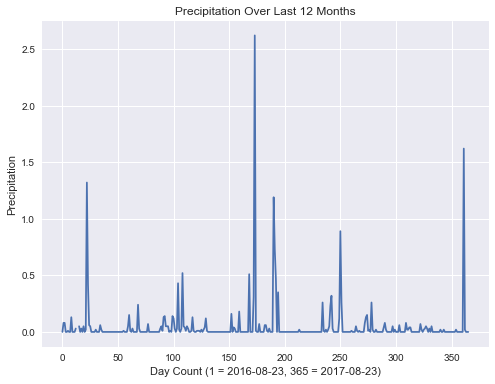

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor = 'white'
plt.plot(precip.index, precip['precipitation'])
plt.xlabel('Day Count (1 = 2016-08-23, 365 = 2017-08-23)')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Last 12 Months')
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Drop unneccessary index column: 
summary = precip.describe()
summary_precip = summary.drop('index', axis = 1)
summary_precip

,precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [22]:
# Design a query to show how many stations are available in this dataset?
stationCount = session.query(station.station).count()
stationCount

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activeStations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(measurement.station.desc())
activeStations

In [24]:
#Put results of active stations query into a df
activeStations_df = pd.DataFrame(activeStations, columns=['station', 'count'])
activeStations_df = activeStations_df.sort_values(by = ['count'], ascending = False)
activeStations_df

,station,count
2,USC00519281,2772
1,USC00519397,2724
7,USC00513117,2709
0,USC00519523,2669
5,USC00516128,2612
6,USC00514830,2202
8,USC00511918,1979
4,USC00517948,1372
3,USC00518838,511


In [25]:
#Get station ID of most active station 
most_active = activeStations_df['station'].iloc[0]
most_active

'USC00519281'

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded

lowest_temp = session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == most_active)
lowest_temp_df = pd.DataFrame(lowest_temp, columns = ['station', 'lowest temp recorded'])
lowest_temp_df

,station,lowest temp recorded
0,USC00519281,54.0


In [27]:
# Find highest temperature recorded of most active station
highest_temp = session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == most_active)
highest_temp_df = pd.DataFrame(highest_temp, columns = ['station', 'highest temp recorded'])
highest_temp_df

,station,highest temp recorded
0,USC00519281,85.0


In [28]:
#Find average temperature recorded of the most active station
avg_temp = session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == most_active)
avg_temp_df = pd.DataFrame(avg_temp, columns = ['station', 'avg temp recorded'])
avg_temp_df

,station,avg temp recorded
0,USC00519281,71.663781


In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temps = session.query(measurement.station, measurement.date, measurement.tobs).filter(measurement.date >= year_range, measurement.station == most_active).all()
most_active_temps_df = pd.DataFrame(most_active_temps,columns = ['station', 'date', 'temp'])
most_active_temps_df

,station,date,temp
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


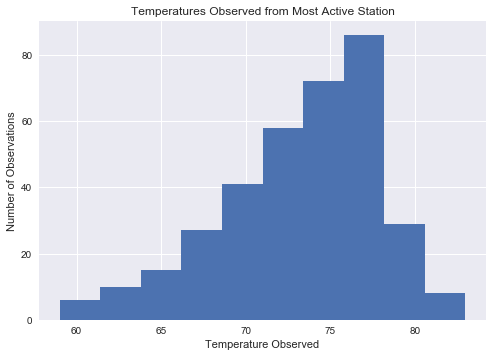

In [30]:
#Plot results as a histogram
plt.hist(most_active_temps_df.temp)
plt.xlabel('Temperature Observed')
plt.ylabel('Number of Observations')
plt.title('Temperatures Observed from Most Active Station')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
